In [30]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential

In [31]:
data = pd.read_csv('train.csv')

In [32]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data.count()

label       42000
pixel0      42000
pixel1      42000
pixel2      42000
pixel3      42000
            ...  
pixel779    42000
pixel780    42000
pixel781    42000
pixel782    42000
pixel783    42000
Length: 785, dtype: int64

In [34]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [35]:
data.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [36]:
data.shape

(42000, 785)

<AxesSubplot:xlabel='label', ylabel='count'>

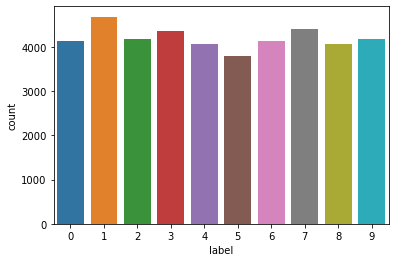

In [37]:
sns.countplot(x=data.label)

In [38]:
x = data.drop('label',axis = 1).to_numpy()
y = data['label'].to_numpy()

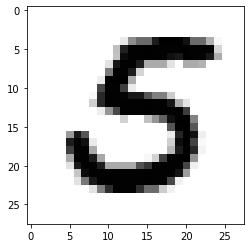

In [39]:
plt.imshow(x[900].reshape(28,28),cmap = plt.cm.binary)

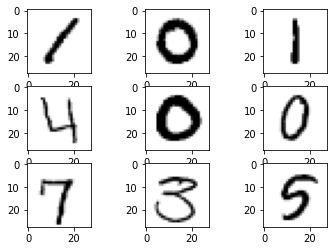

In [40]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x[i].reshape(28,28),cmap = plt.cm.binary)

# Modelo Redes Neuronales Simple

### Dividimos la data entre train y test

In [41]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:785], data.iloc[:,0], test_size = 0.1, random_state = 42)

### Le damos la forma adecuada para poder realizar el modelo

In [42]:
x_train = x_train.values.reshape(37800, 784)
x_test = x_test.values.reshape(4200, 784)

### Computamos el numero de labels

In [43]:
num_labels = len(np.unique(y_train))

### Convertimos la data a un vector one-hot

In [44]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Normalizamos la data por cada imagen

In [45]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### Definimos unos parametros de la red neuronal

In [46]:
input_size = x_train.shape[1]
batch_size = 64
dropout = 0.45

### Definimos el modelo de redes neuronal de tres capas

In [47]:
model = Sequential()
model.add(Dense(256, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

### Entrenamos la red neuronal y lo validamos

In [48]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: ", (100.0 * acc))

Epoch 1/20
591/591 [==============================] - 2s 2ms/step - loss: 0.5880 - accuracy: 0.8192
Epoch 2/20
591/591 [==============================] - 1s 1ms/step - loss: 0.2717 - accuracy: 0.9221
Epoch 3/20
591/591 [==============================] - 2s 3ms/step - loss: 0.2142 - accuracy: 0.9381
Epoch 4/20
591/591 [==============================] - 2s 3ms/step - loss: 0.1808 - accuracy: 0.9488
Epoch 5/20
591/591 [==============================] - 2s 3ms/step - loss: 0.1645 - accuracy: 0.9540
Epoch 6/20
591/591 [==============================] - 1s 3ms/step - loss: 0.1460 - accuracy: 0.9583
Epoch 7/20
591/591 [==============================] - 2s 3ms/step - loss: 0.1330 - accuracy: 0.9616
Epoch 8/20
591/591 [==============================] - 2s 3ms/step - loss: 0.1212 - accuracy: 0.9634
Epoch 9/20
591/591 [==============================] - 1s 2ms/step - loss: 0.1160 - accuracy: 0.9664
Epoch 10/20
591/591 [==============================] - 2s 3ms/step - loss: 0.1112 - accuracy: 0.9673

### Observamos que el modelo de una red neuronal simple tiene una accuracy de aprox 97.6%